## Data Exploration

In this notebook, we are going to take a closer look at the data. Let us begin by loading everything in.

In [6]:
import librosa
import pandas as pd
import numpy as np
from IPython.lib.display import Audio
from matplotlib import pyplot as plt
import multiprocessing
import scipy.signal
from scipy import signal

anno = pd.read_pickle('data/anno.pkl')

In [7]:
anno.head()

,fold,category,esc10,audio
0,1,dog,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,chirping_birds,False,"[-0.01184082, -0.10336304, -0.14141846, -0.120..."
2,1,vacuum_cleaner,False,"[-0.006958008, -0.012512207, -0.011260986, -0...."
3,1,vacuum_cleaner,False,"[0.53897095, 0.39627075, 0.26739502, 0.1376648..."
4,1,thunderstorm,False,"[-0.00036621094, -0.0007019043, -0.00079345703..."


All of the audio has been recorded with a sample rate of 44.1 kHz. Each example is 5 seconds long.

Annotations include the category label (there are 50 categoris in total). Additionally, there is a smaller, less diversed dataset, that was sampled from this one - the ESC-10. Whether a recording made it into that dataset is indicated by the `esc10` column.

Additionally, this dataset contains a suggestion on how to split it into folds. This information is contained in the `fold` column. This has been designed to minimize leakage - following these splits, all the segments from a single audio file should be in the same fold.

In [8]:
SAMPLE_RATE = 44100

There are 2000 records in this dataset.

In [9]:
anno.shape[0]

2000

And the categories are balanced - 40 examples per category.

In [10]:
anno.category.value_counts()

rooster             40
clock_tick          40
crying_baby         40
snoring             40
airplane            40
washing_machine     40
crackling_fire      40
chainsaw            40
door_wood_knock     40
thunderstorm        40
cat                 40
hen                 40
frog                40
vacuum_cleaner      40
pig                 40
sheep               40
train               40
cow                 40
water_drops         40
toilet_flush        40
breathing           40
door_wood_creaks    40
chirping_birds      40
keyboard_typing     40
laughing            40
brushing_teeth      40
clapping            40
hand_saw            40
mouse_click         40
fireworks           40
can_opening         40
car_horn            40
coughing            40
siren               40
glass_breaking      40
footsteps           40
sneezing            40
sea_waves           40
church_bells        40
insects             40
drinking_sipping    40
dog                 40
helicopter          40
wind       

To get a better feel for the dataset, let's listen to an example from each of the classes!

In [29]:
from IPython.core.display import HTML

for category in anno.category.unique():
    display(HTML(f'''
        {category}
        <audio style="display: block"
        controls
        src="assets/{category}.wav">
            Your browser does not support the
            <code>audio</code> element.
        </audio>
        ''')
    )

Last but not least, let's take a look at a spectrogram for an example from each category.

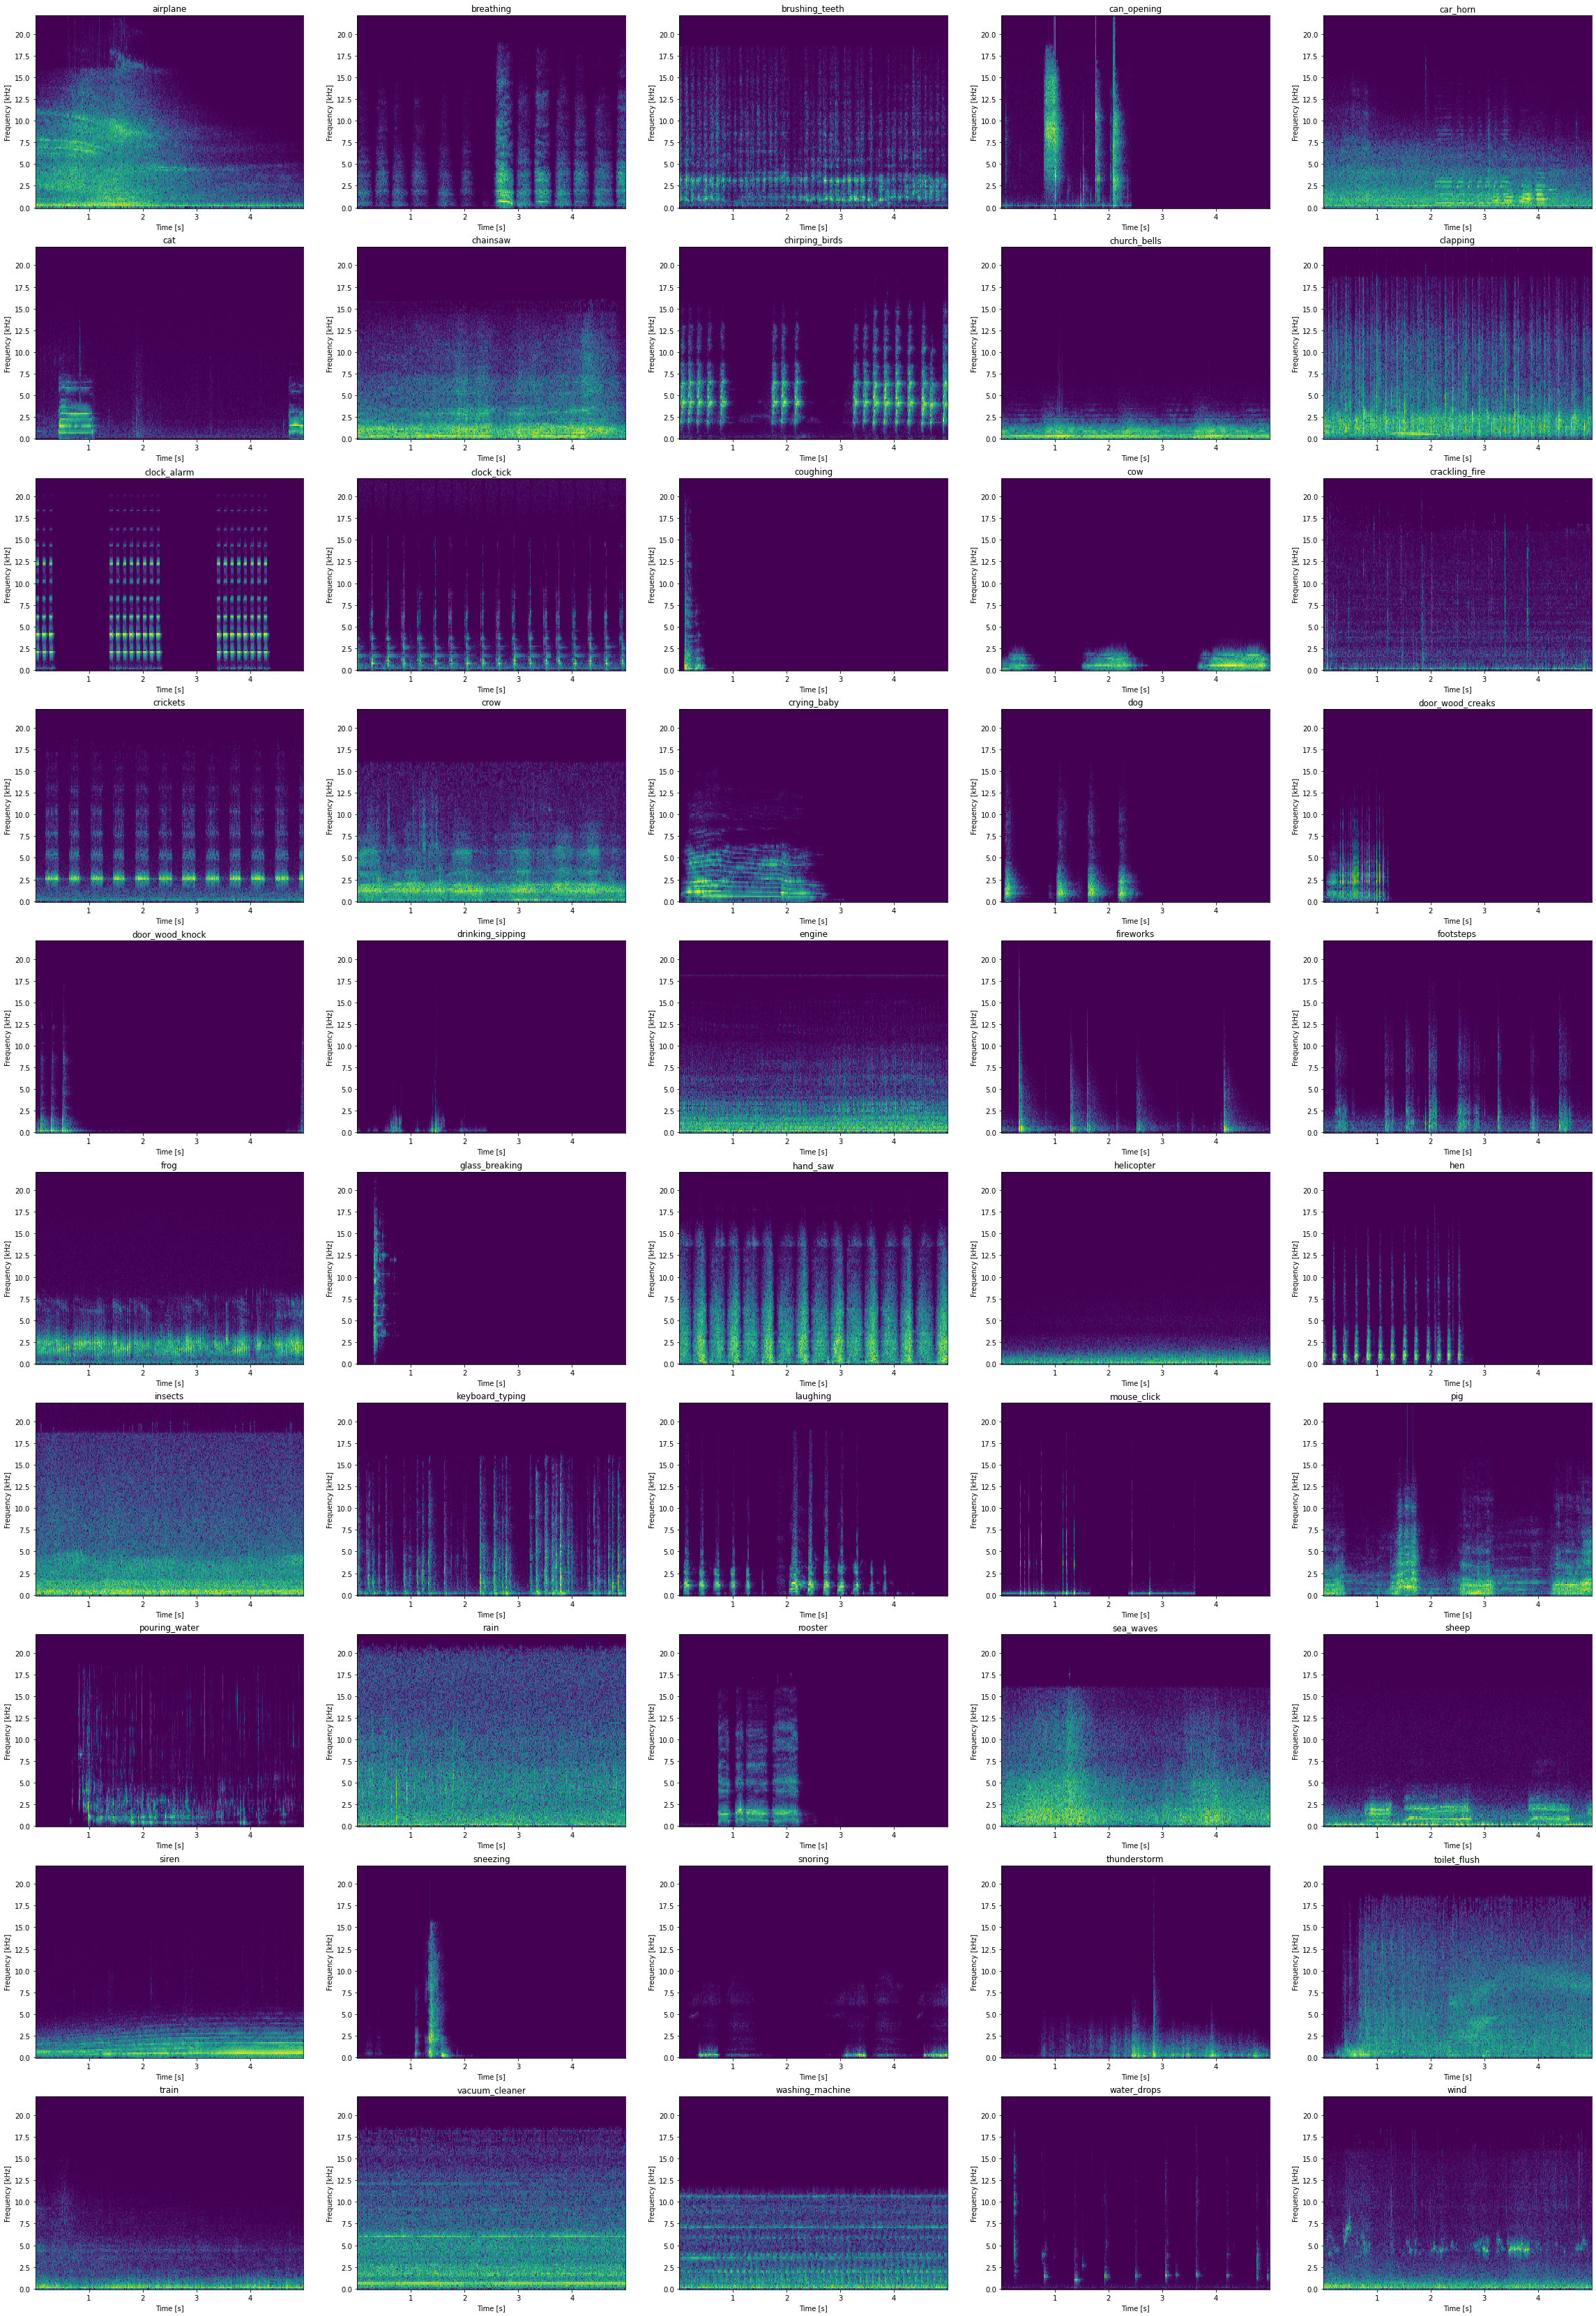

In [33]:
fig, subplots = plt.subplots(10,5, figsize=(40,60))

for (idx, row), ax in zip(anno.groupby('category').sample(n=1).iterrows(), subplots.flat):
    freqs, times, Sx = signal.spectrogram(row.audio, fs=SAMPLE_RATE)
    ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx+1e-9), cmap='viridis', shading='auto')
    ax.set_ylabel('Frequency [kHz]')
    ax.set_xlabel('Time [s]');
    ax.set_title(row.category)